In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load datasets
train = pd.read_csv("../data/TRAIN_DATA.csv")
test = pd.read_csv("../data/TEST_DATA.csv")

print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

Training set shape: (630000, 26)
Test set shape: (70000, 25)


In [ ]:
# inspect columns and data types
print("Columns in training set:\n", train.columns)

print("\nData Info:")
train.info()

print("\nFirst 5 rows:")
display(train.head())

Columns in training set:
 Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  630000 non-null  int64  
 1   age                                 630000 non-null  int64  
 2   a

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,55,2,89,4.7,7.6,6.8,30.7,0.91,131,...,Female,White,Graduate,Low,Never,Employed,0,0,0,1.0
1,1,50,1,59,7.1,4.9,8.6,27.1,0.87,113,...,Male,White,Graduate,Middle,Current,Employed,0,0,0,1.0
2,2,34,4,46,1.7,6.6,4.0,32.0,0.94,119,...,Female,White,Highschool,Lower-Middle,Current,Unemployed,0,0,0,0.0
3,3,69,2,245,3.9,6.0,3.5,30.1,0.92,135,...,Male,Black,Graduate,Lower-Middle,Never,Employed,0,0,0,0.0
4,4,44,2,62,6.4,7.9,5.6,22.5,0.83,104,...,Female,White,Graduate,Lower-Middle,Never,Employed,0,0,0,0.0


In [4]:
# numeric features
print("\nSummary statistics for numeric features:")
display(train.describe())
numeric_cols = train.select_dtypes(include=['int64','float64']).columns.drop('id')


Summary statistics for numeric features:


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,50.363227,2.071648,80.231557,5.963251,7.001907,6.012962,25.874561,0.858755,116.295073,75.440187,70.171635,186.826567,53.823516,102.914338,123.084843,0.149430,0.181995,0.030349,0.623295
std,181865.479132,11.652836,1.047572,51.201002,1.463775,0.901905,2.022679,2.860022,0.037975,11.008478,6.824568,6.938096,16.734801,8.269259,19.024615,24.749024,0.356512,0.385841,0.171546,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,157499.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,314999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,472499.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,629999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# explore numeric features
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.drop('id')
numeric_cols

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

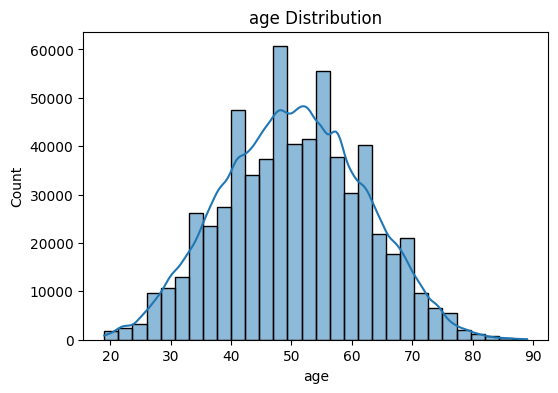

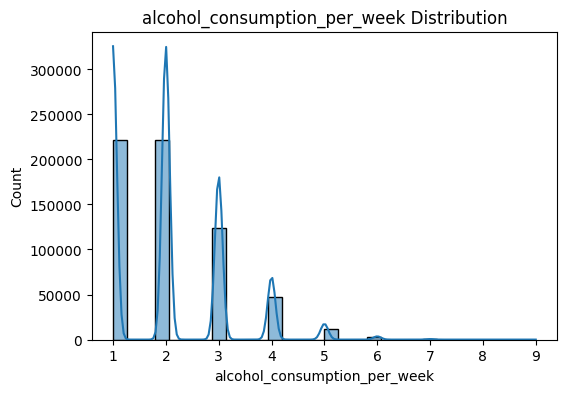

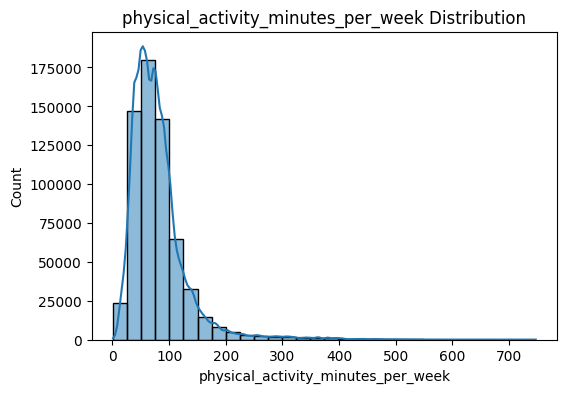

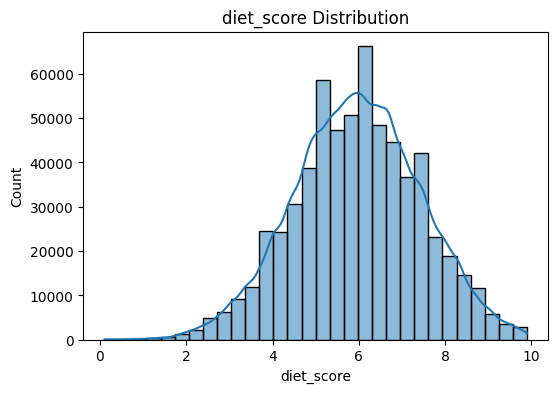

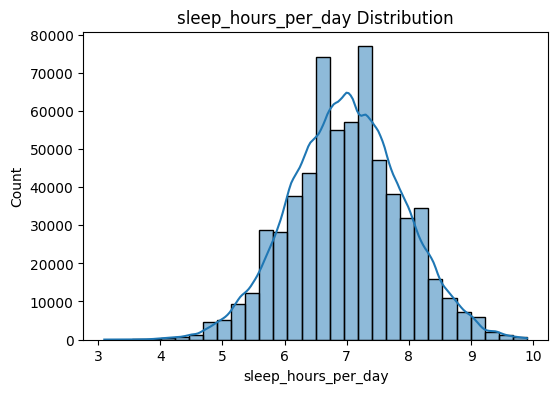

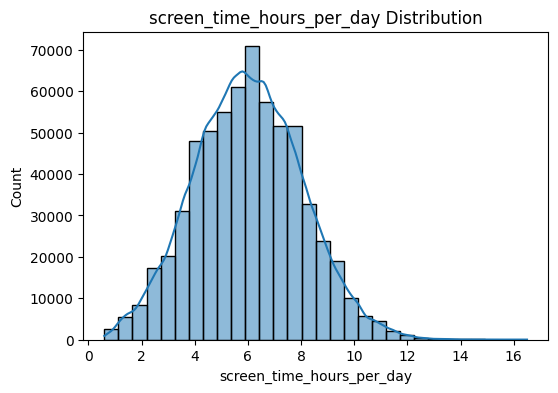

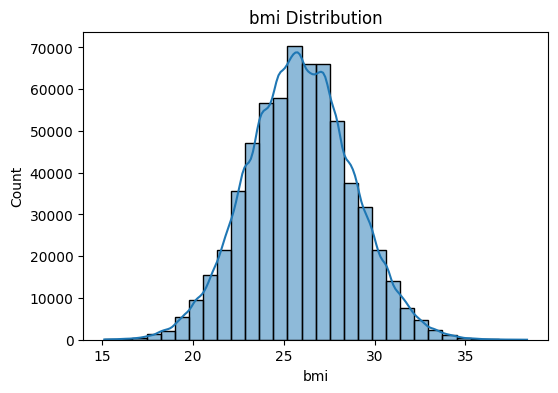

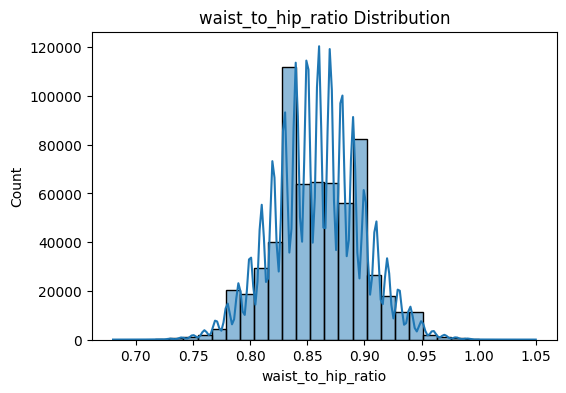

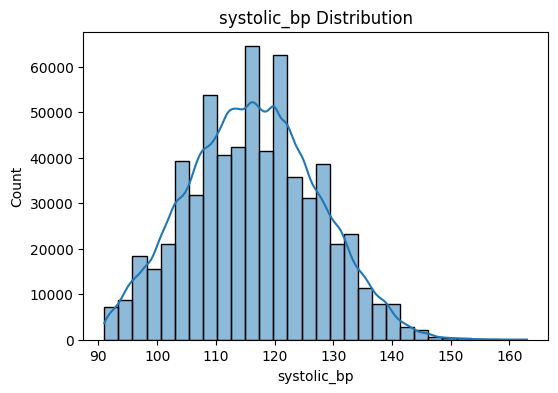

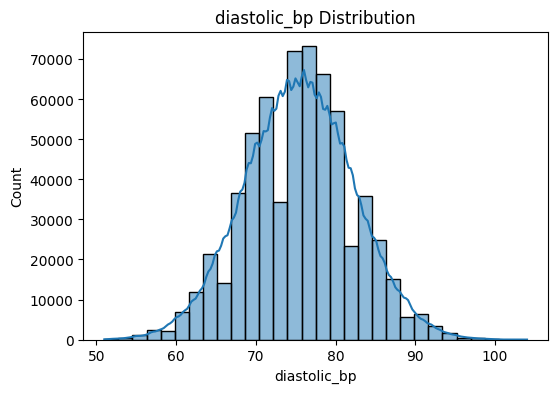

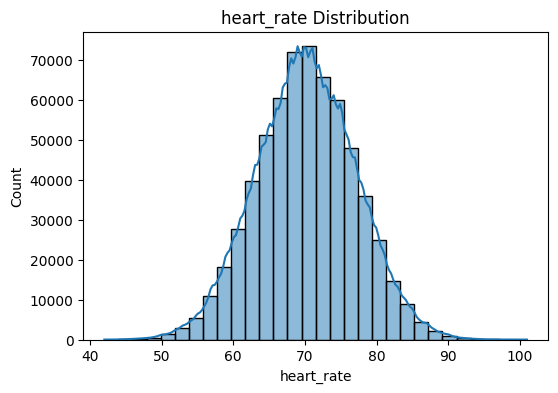

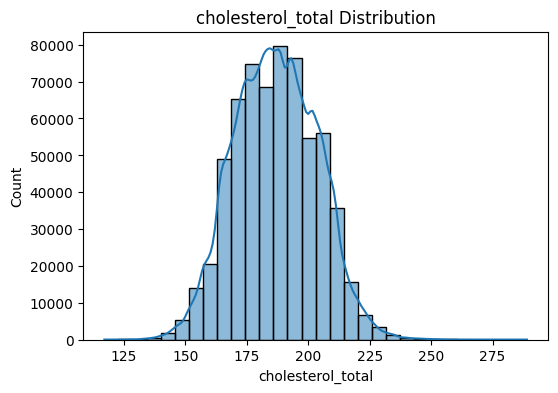

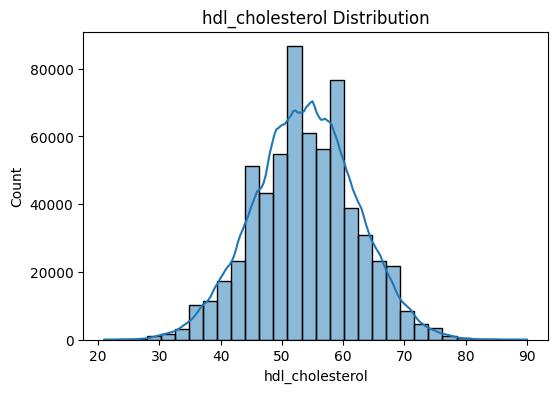

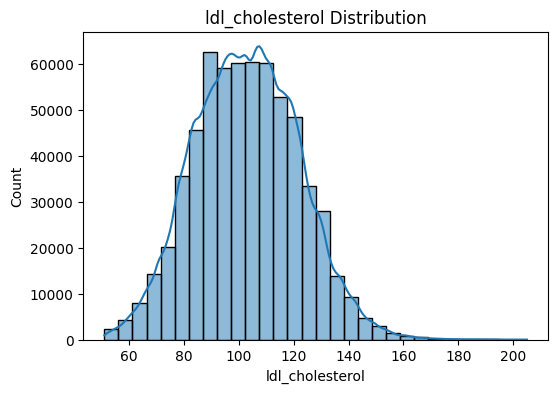

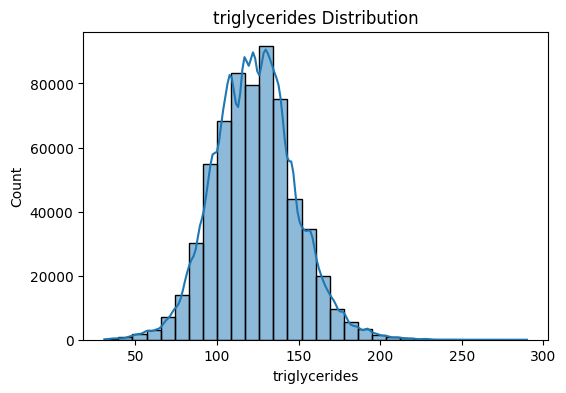

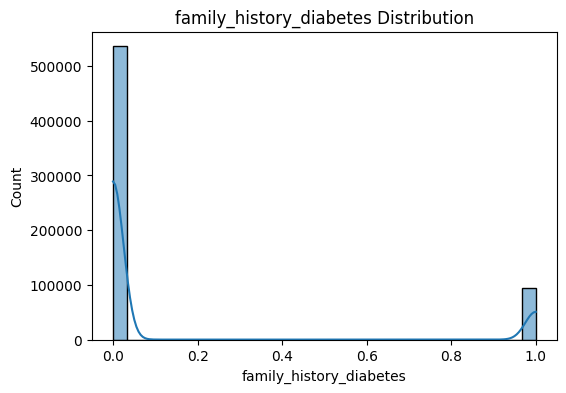

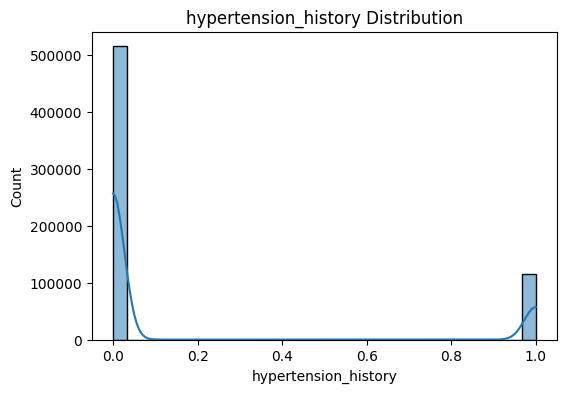

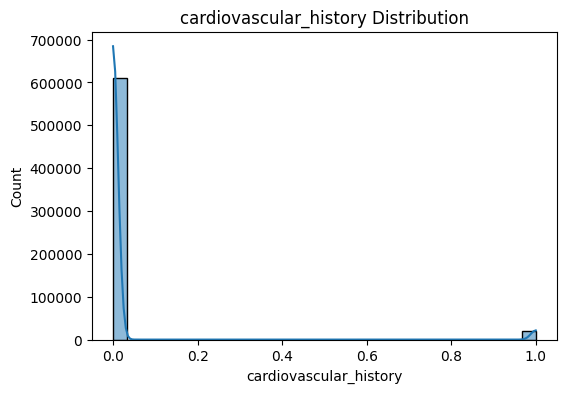

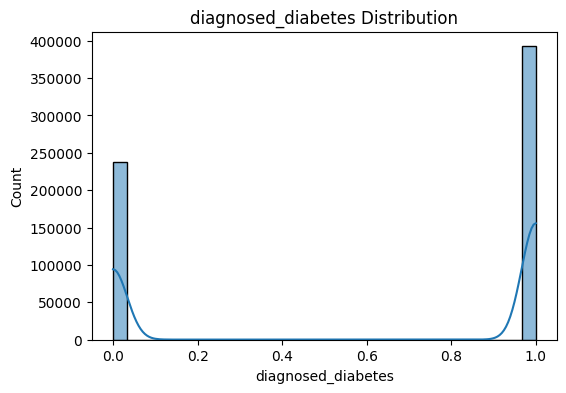

In [6]:
# histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

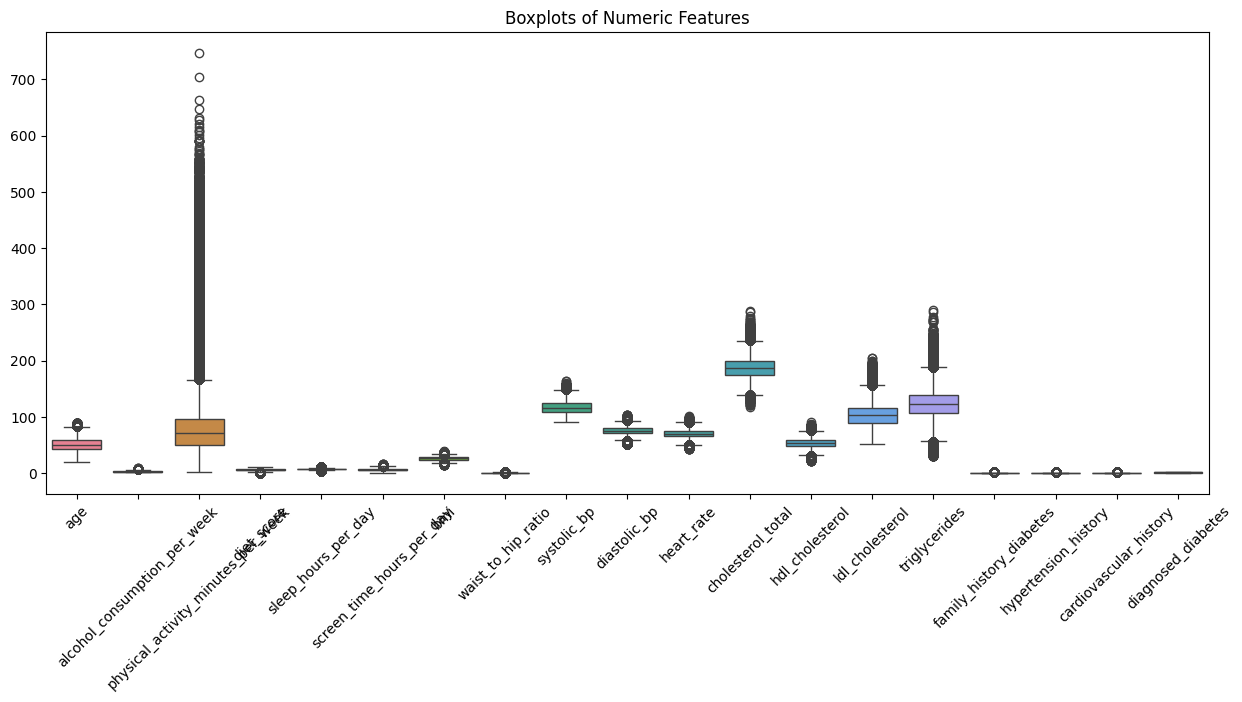

In [7]:
# boxplots for outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=train[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features")
plt.show()

In [8]:
# categorical features
categorical_cols = train.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(train[col].value_counts())


Value counts for gender:
gender
Female    326956
Male      299742
Other       3302
Name: count, dtype: int64

Value counts for ethnicity:
ethnicity
White       347422
Hispanic    117060
Black        95618
Asian        54196
Other        15704
Name: count, dtype: int64

Value counts for education_level:
education_level
Highschool      309691
Graduate        235276
Postgraduate     71662
No formal        13371
Name: count, dtype: int64

Value counts for income_level:
income_level
Middle          261430
Lower-Middle    160704
Upper-Middle    115163
Low              77246
High             15457
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
Never      445101
Current     93003
Former      91896
Name: count, dtype: int64

Value counts for employment_status:
employment_status
Employed      464514
Retired       104151
Unemployed     44860
Student        16475
Name: count, dtype: int64


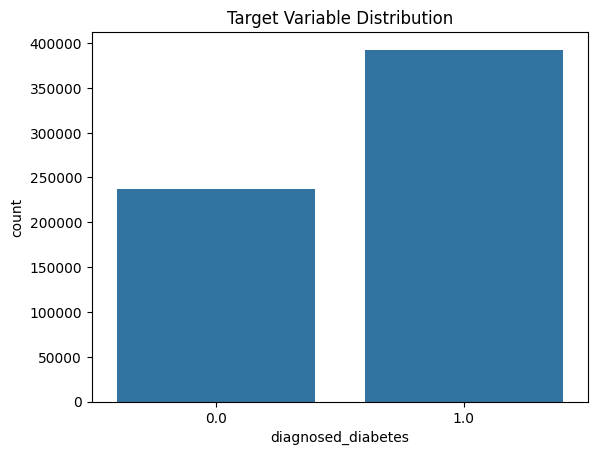

In [9]:
# target variable analysis
sns.countplot(x='diagnosed_diabetes', data=train)
plt.title("Target Variable Distribution")
plt.show()

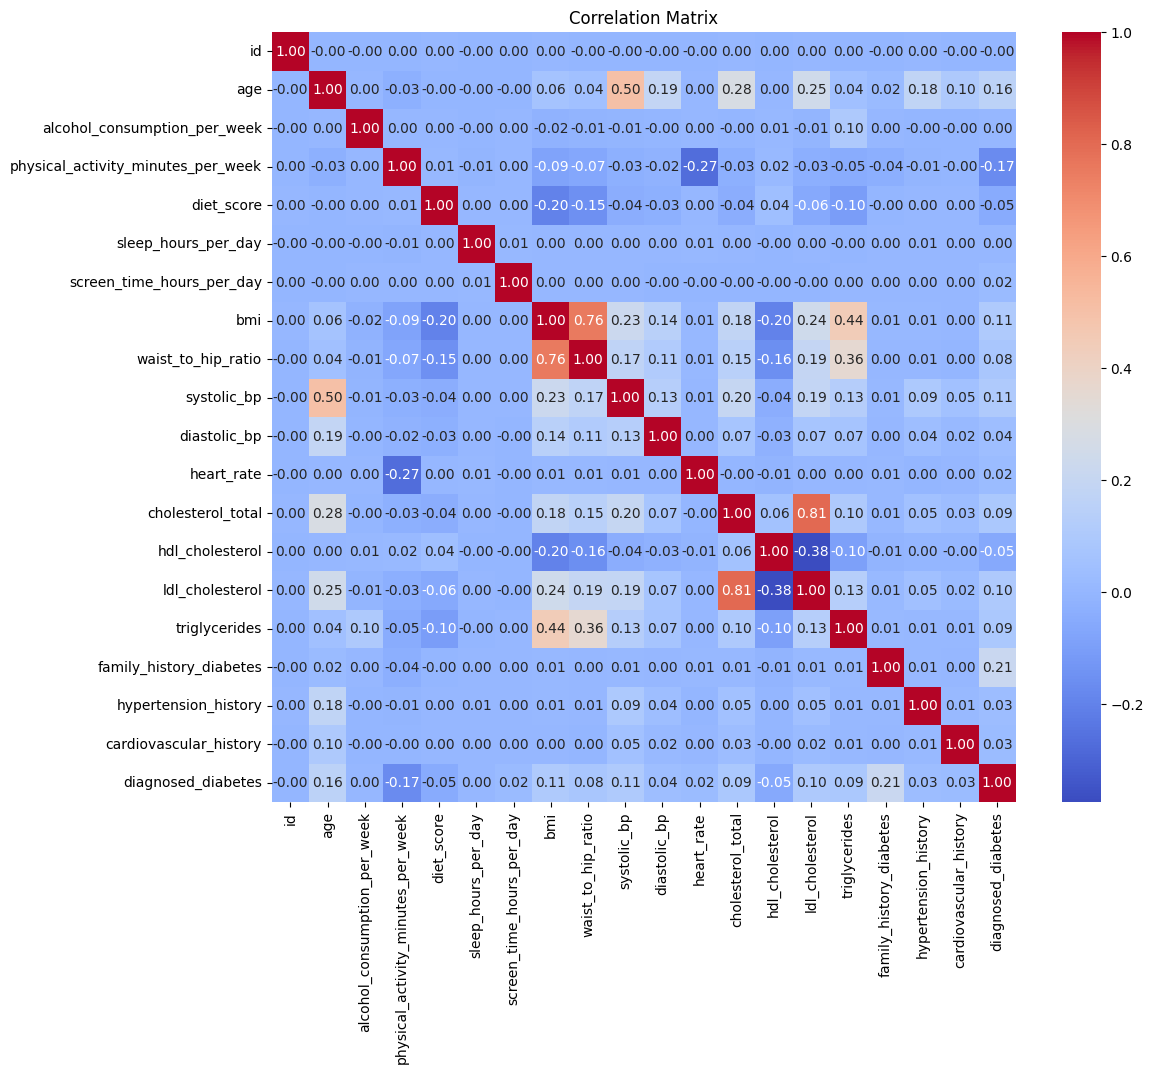

In [10]:
# correlation analysis
plt.figure(figsize=(12,10))
numeric_df = train.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# summary / observations
print("Summary:")

print(f"Number of samples: {train.shape[0]}")
print(f"Number of features: {train.shape[1]}")

# numeric vs categorical
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = train.select_dtypes(include=['object','category']).columns.tolist()

print(f"\nNumeric features: {len(num_cols)}")
print(f"Categorical features: {len(cat_cols)}")

# missing values
missing = train.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("\nNo missing values detected.")
else:
    print("\nColumns with missing values:")
    print(missing)

# target distribution
print("\nTarget variable distribution (diagnosed_diabetes):")
print(train['diagnosed_diabetes'].value_counts(normalize=True)*100)

# Short analysis text
print("""
Observations:
- Dataset contains demographic, lifestyle, and clinical health indicators.
- Numeric features vary widely in scale → scaling will be required.
- Categorical features must be encoded before modeling.
- Target distribution above shows whether the dataset is balanced or imbalanced.
- Next step: Preprocessing (handle missing values, encode categorical vars, scale & prepare data for ML).
""")

Summary:
Number of samples: 630000
Number of features: 26

Numeric features: 20
Categorical features: 6

No missing values detected.

Target variable distribution (diagnosed_diabetes):
diagnosed_diabetes
1.0    62.329524
0.0    37.670476
Name: proportion, dtype: float64

Observations:
- Dataset contains demographic, lifestyle, and clinical health indicators.
- Numeric features vary widely in scale → scaling will be required.
- Categorical features must be encoded before modeling.
- Target distribution above shows whether the dataset is balanced or imbalanced.
- Next step: Preprocessing (handle missing values, encode categorical vars, scale & prepare data for ML).

